In [2]:
import pandas as pd
import random
import numpy as np

In [3]:
df = pd.read_csv("Csv_data/recording_1590473015_teco_praktikum_proband1.csv", index_col=[0])
df_all = pd.read_csv("Csv_data/all.csv", index_col=[0])

In [4]:
take_coord = df.loc[df['label'] == 1, ['rtls_x_filtered', 'rtls_y_filtered']]
drop_coord = df.loc[df['label'] == 2, ['rtls_x_filtered', 'rtls_y_filtered']]

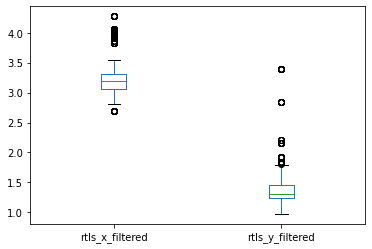

In [5]:
take_coord.plot.box()

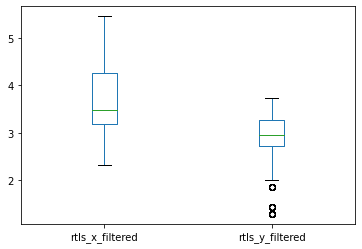

In [6]:
drop_coord.plot.box()

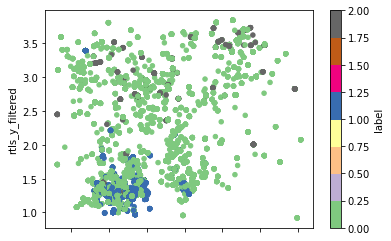

In [7]:
df.plot.scatter(x='rtls_x_filtered', y='rtls_y_filtered', c='label', cmap='Accent');

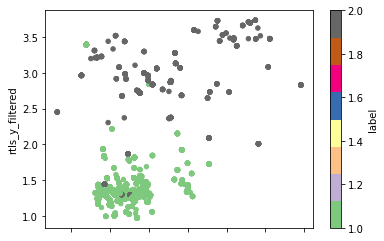

In [8]:
df[df['label'] != 0].plot.scatter(x='rtls_x_filtered', y='rtls_y_filtered', c='label', cmap='Accent');

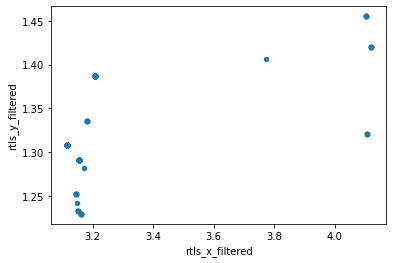

In [9]:
df[0:300].plot.scatter(x='rtls_x_filtered', y='rtls_y_filtered');

### Other Columns

In [13]:
df_all[['rtls_accuracy',
       'rtls_accuracy_radius', 'rtls_mapped_position', 'rtls_state']].nunique()

rtls_accuracy           1
rtls_accuracy_radius    1
rtls_mapped_position    1
rtls_state              5
dtype: int64

In [14]:
df_all['rtls_state'].value_counts()

1.000000    178960
2.000000    170483
1.500000      1397
1.666667       531
1.333333       497
Name: rtls_state, dtype: int64

Dies zeigt: Wir sollten rtls_accuracy, rtls_accuracy_radius und rtls_mapped_position entfernen, da diese keinerlei Information enthalten und immer den gleichen Wert besitzen. rtls_state hingegen besitzt verschiedene Werte und kann daher weiter verarbeitet werden.

### Filtered vs Unfiltered

In [21]:
x_diff = np.abs(df_all['rtls_x_filtered'] - df_all['rtls_x_unfiltered'])
x_diff.describe()

count    351868.000000
mean          0.078965
std           0.189627
min           0.000000
25%           0.000000
50%           0.002030
75%           0.061393
max           2.845730
dtype: float64

In [23]:
y_diff = np.abs(df_all['rtls_y_filtered'] - df_all['rtls_y_unfiltered'])
y_diff.describe()

count    351868.000000
mean          0.141922
std           0.323872
min           0.000000
25%           0.000000
50%           0.003821
75%           0.110862
max           3.271159
dtype: float64

In [25]:
x_diff[x_diff > 2.5]

2020-05-26 10:21:03.420    2.84573
2020-05-26 10:21:03.440    2.84573
2020-05-26 10:21:03.460    2.84573
2020-05-26 10:21:03.480    2.84573
2020-05-26 10:21:03.500    2.84573
dtype: float64

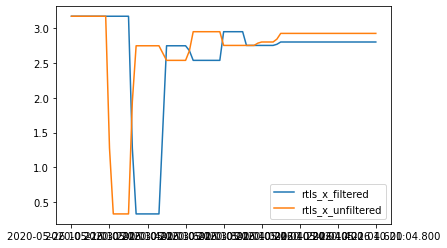

In [41]:
df_all['2020-05-26 10:21:03.200':'2020-05-26 10:21:04.800'].plot(y=['rtls_x_filtered', 'rtls_x_unfiltered']);

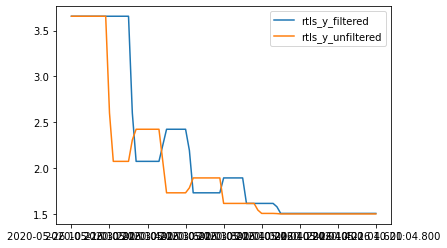

In [40]:
df_all['2020-05-26 10:21:03.200':'2020-05-26 10:21:04.800'].plot(y=['rtls_y_filtered', 'rtls_y_unfiltered']);

In [42]:
x_diff[x_diff > 2]

2020-05-26 09:37:28.100    2.385599
2020-05-26 09:37:28.120    2.385599
2020-05-26 09:37:28.140    2.385599
2020-05-26 09:37:28.160    2.385599
2020-05-26 09:37:28.180    2.385599
                             ...   
2020-05-26 17:53:20.720    2.046925
2020-05-26 17:53:20.740    2.046925
2020-05-26 17:53:20.760    2.046925
2020-05-26 17:53:20.780    2.046925
2020-05-26 17:53:20.800    2.046925
Length: 98, dtype: float64

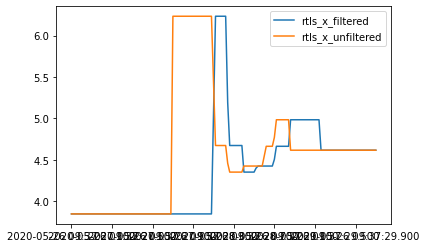

In [43]:
df_all['2020-05-26 09:37:27.100':'2020-05-26 09:37:30.100'].plot(y=['rtls_x_filtered', 'rtls_x_unfiltered']);

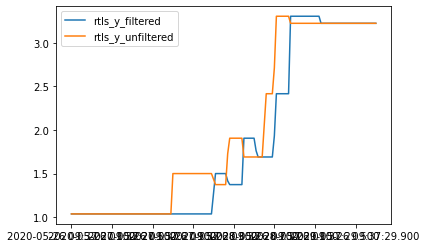

In [44]:
df_all['2020-05-26 09:37:27.100':'2020-05-26 09:37:30.100'].plot(y=['rtls_y_filtered', 'rtls_y_unfiltered']);